In [65]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [67]:
mars_data = pd.read_html(url)
mars_data

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [68]:
mars_df=mars_data[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [69]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [70]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [71]:
mars_df = mars_df.reset_index(drop=True)
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [87]:
# Answer the following question: How many months exist on Mars?
num_mars=len(mars_df['month'].unique())
num_mars

12

In [89]:
# Answer the following question: How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_days= len(mars_df['terrestrial_date'].unique())
num_days

1867

In [74]:
# Answer the following question: What are the coldest and the warmest months on Mars (at the location of Curiosity)?  
# Average the minimum daily temperature of all the months. 
month_temp_df = mars_df.groupby('month').agg({'min_temp':['mean']})
month_temp_df

,min_temp
,mean
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979


In [75]:
month_temp_df.columns=['min_temp']
monthly_df = month_temp_df.reset_index()
monthly_df

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


In [76]:
#Find the coldest month
coldest_month = month_temp_df[month_temp_df['min_temp'] == month_temp_df['min_temp'].min()]
coldest_month


,min_temp
month,
3,-83.307292


In [77]:
#Find the warmest month
warmest_month = month_temp_df[month_temp_df['min_temp'] == month_temp_df['min_temp'].max()]
warmest_month

,min_temp
month,
8,-68.382979


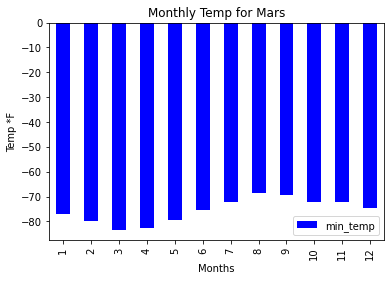

In [78]:
#Plot the results as a bar chart.
mars_plot = month_temp_df.plot(kind="bar", title="Monthly Temp for Mars", figsize=(6,4), color="blue")
plt.xlabel("Months")
plt.ylabel("Temp *F")
plt.show()

In [79]:
# Answer the following question: Which months have the lowest and the highest atmospheric pressure on Mars? 
# Get the answer by averaging the daily atmospheric pressure of all the months. 
pressure_mars = mars_df.groupby('month')
monthly_pressure = pressure_mars[['pressure']].mean()

pressure_mars
monthly_pressure


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [80]:
#Find the highest atmospheric pressure
high_pressure = monthly_pressure[monthly_pressure['pressure'] == monthly_pressure['pressure'].max()]
high_pressure

,pressure
month,
9,913.30597


In [81]:
#Find the lowest atmospheric pressure
low_pressure = monthly_pressure[monthly_pressure['pressure'] == monthly_pressure['pressure'].min()]
low_pressure

,pressure
month,
6,745.054422


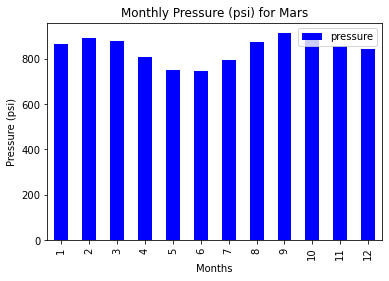

In [82]:
#Plot the results as a bar chart.
pressure_plot = monthly_pressure.plot(kind="bar", title="Monthly Pressure (psi) for Mars", figsize=(6,4), color="blue")
plt.xlabel("Months")
plt.ylabel("Pressure (psi)")
plt.show()

<AxesSubplot:xlabel='terrestrial_date', ylabel='min_temp'>

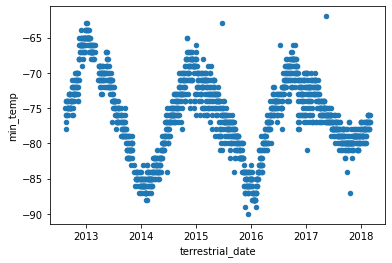

In [83]:
# About how many terrestrial (Earth) days exist in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature.

mars_df.plot.scatter(x='terrestrial_date', y='min_temp')

In [84]:
# Export the DataFrame to a CSV file.
mars_df.to_csv('mars_data.csv', index=False)